In [61]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from tensorflow import keras

Visualización del dataset

In [86]:
directory_train='../dataset/train'
directory_test='../dataset/test'

processed_dataset = '../dataset/processed/'

IMG_SIZE = (160, 160)
BATCH_SIZE=32

train_labels_df = pd.read_csv('../dataset/Training_set.csv')
print("Cantidad de clases: ",train_labels_df["label"].nunique())
train_labels_df=train_labels_df.set_index("filename")["label"].to_dict()
train_labels_df


Cantidad de clases:  75


{'Image_1.jpg': 'SOUTHERN DOGFACE',
 'Image_2.jpg': 'ADONIS',
 'Image_3.jpg': 'BROWN SIPROETA',
 'Image_4.jpg': 'MONARCH',
 'Image_5.jpg': 'GREEN CELLED CATTLEHEART',
 'Image_6.jpg': 'CAIRNS BIRDWING',
 'Image_7.jpg': 'GREEN CELLED CATTLEHEART',
 'Image_8.jpg': 'EASTERN DAPPLE WHITE',
 'Image_9.jpg': 'BROWN SIPROETA',
 'Image_10.jpg': 'RED POSTMAN',
 'Image_11.jpg': 'MANGROVE SKIPPER',
 'Image_12.jpg': 'BLACK HAIRSTREAK',
 'Image_13.jpg': 'CABBAGE WHITE',
 'Image_14.jpg': 'RED ADMIRAL',
 'Image_15.jpg': 'PAINTED LADY',
 'Image_16.jpg': 'MANGROVE SKIPPER',
 'Image_17.jpg': 'PAPER KITE',
 'Image_18.jpg': 'SOOTYWING',
 'Image_19.jpg': 'PINE WHITE',
 'Image_20.jpg': 'PEACOCK',
 'Image_21.jpg': 'CHECQUERED SKIPPER',
 'Image_22.jpg': 'JULIA',
 'Image_23.jpg': 'COMMON WOOD-NYMPH',
 'Image_24.jpg': 'BLUE MORPHO',
 'Image_25.jpg': 'CLOUDED SULPHUR',
 'Image_26.jpg': 'STRAITED QUEEN',
 'Image_27.jpg': 'ORANGE OAKLEAF',
 'Image_28.jpg': 'PURPLISH COPPER',
 'Image_29.jpg': 'CLOUDED SULPHUR',
 'Ima

Creación de subfolder para cada clase de mariposa debido a que el dataset de forma nativa no tiene esta estructura

In [40]:
#Para conjuntos de datos de train
for image,label in train_labels_df.items():  
    dest_train_folder = f"{processed_dataset}train/{label}"
    os.makedirs(dest_train_folder,exist_ok=True)  

    image_path_in_original_folder = f"{directory_train}/{image}"
    if os.path.exists(image_path_in_original_folder):
        shutil.move(image_path_in_original_folder,dest_train_folder)

In [43]:
#Para conjunto de datos de test
for image,label in train_labels_df.items():  
    dest_train_folder = f"{processed_dataset}test/{label}"
    os.makedirs(dest_train_folder,exist_ok=True)  

    image_path_in_original_folder = f"{directory_test}/{image}"
    #print(image_path_in_original_folder)
    if os.path.exists(image_path_in_original_folder):
        shutil.move(image_path_in_original_folder,dest_train_folder)

In [119]:
train_dataset = image_dataset_from_directory(directory=f"{processed_dataset}/train",shuffle=True, batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=42,validation_split=0.2,subset='training')

test_dataset = image_dataset_from_directory(directory=f"{processed_dataset}/train",shuffle=True, batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=42,validation_split=0.2,subset='validation')

Found 1947 files belonging to 76 classes.
Using 1558 files for training.
Found 1947 files belonging to 76 classes.
Using 389 files for validation.


In [120]:
class_names = train_dataset.class_names
print(class_names)
print(len(class_names))

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRA

Visualización de imagenes de entrenamiento

Lables:  tf.Tensor(
[50 64 59 51 41  2 29 61 54 21 38  1 11 67 26 13 45 38 19 46 52  8 12 58
 41 14 11 28 35 58 63 21], shape=(32,), dtype=int32)


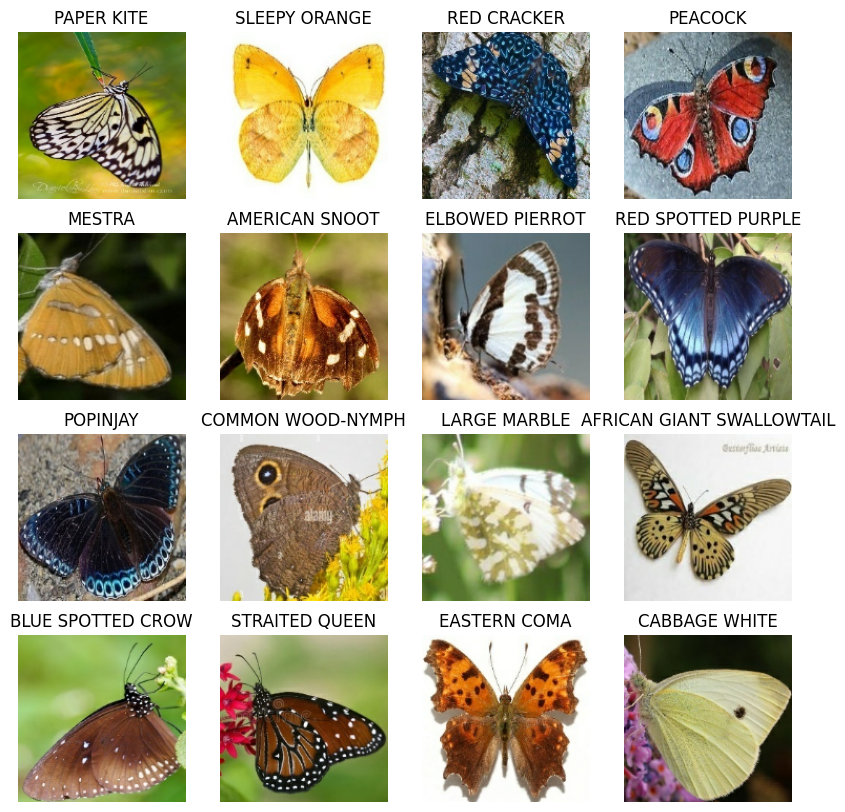

In [121]:
plt.figure(figsize=(10,10))
for images,labels in train_dataset.take(1):
    print("Lables: ",labels)
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        #print("Posicion: ",class_names[i])
        plt.axis('off')
plt.show()

DATA AUGMENTATION

In [123]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2)
])

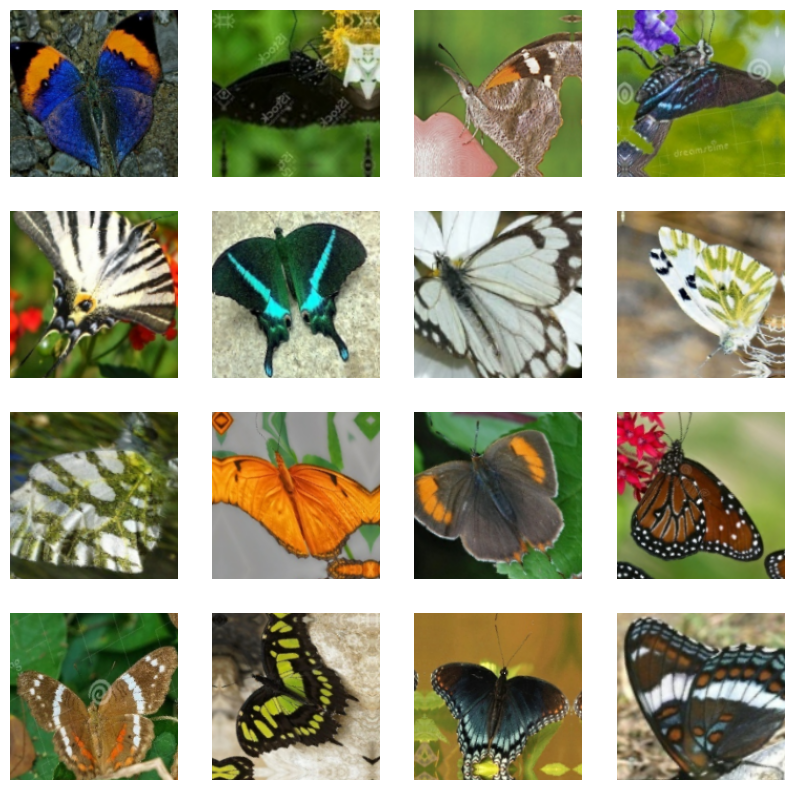

In [124]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
    imgs_augmented = data_augmentation(images)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(imgs_augmented[i].numpy().astype('uint8'))
        plt.axis("off")
plt.show()

CREACIÓN DE LA RED NEURONAL

In [125]:
CNN = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255),
    Conv2D(32, 3, strides=2,padding='same',activation='relu',input_shape=(160,160,3)),
    MaxPooling2D(),
    Conv2D(64,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(256,3,strides=2,padding='same',activation='relu'),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(76),
])


c:\Users\aeagu\Documents\proyectos_de_desarrollo\AI\Reconocimiento de mariposasd\ai_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
CNN.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [128]:
CNN.fit(train_dataset,validation_data=test_dataset,epochs=100)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2598 - loss: 2.6602 - val_accuracy: 0.2237 - val_loss: 3.1110
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2762 - loss: 2.5533 - val_accuracy: 0.2339 - val_loss: 3.0164
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3134 - loss: 2.3859 - val_accuracy: 0.2339 - val_loss: 3.0462
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3483 - loss: 2.2885 - val_accuracy: 0.2879 - val_loss: 2.9108
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3750 - loss: 2.1906 - val_accuracy: 0.2982 - val_loss: 2.7094
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3917 - loss: 2.0936 - val_accuracy: 0.3239 - val_loss: 2.5272
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4218 - loss: 1.9780 - val_accuracy: 0.3188 - val_loss: 2.6751
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4382 - loss: 1.9365 - val_accuracy: 0.

In [129]:
CNN.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (32, 160, 160, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_14 (Rescaling)        │ (32, 160, 160, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (32, 80, 80, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (32, 40, 40, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (32, 20, 20, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (32, 10, 10, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (32, 5, 5, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (32, 2, 2, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (32, 1, 1, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (32, 100)              │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (32, 76)               │         7,676 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265,378 (4.83 MB)

 Trainable params: 421,792 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,586 (3.22 MB)

In [132]:
CNN.evaluate(test_dataset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4341 - loss: 3.9365


[3.7421112060546875, 0.45758354663848877]

In [133]:
classification = CNN.predict(test_dataset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


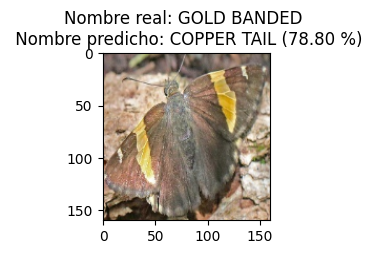

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


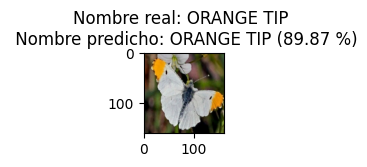

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


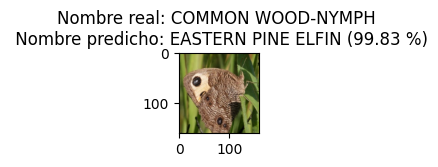

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


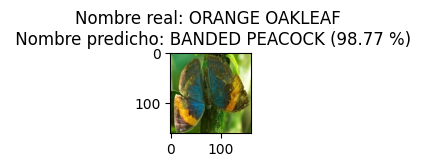

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


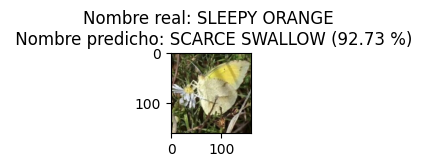

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


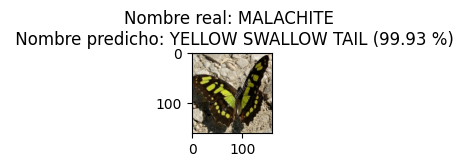

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


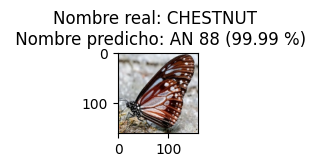

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


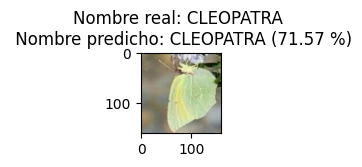

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


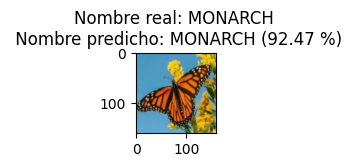

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


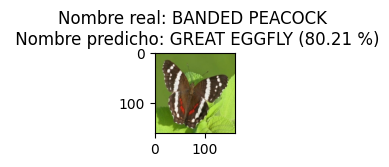

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


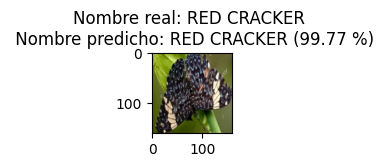

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


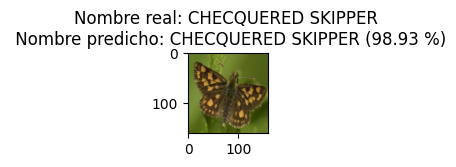

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


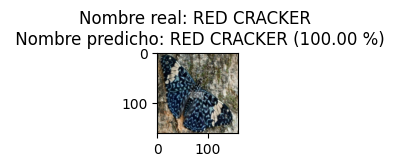

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


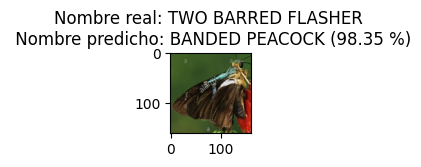

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


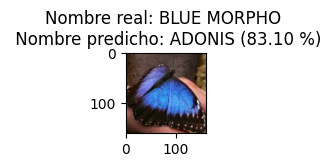

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


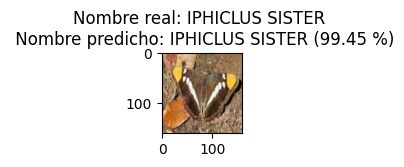

In [138]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
    for i in range(16):
        img_array = tf.keras.preprocessing.image.img_to_array(images[i])
        img_array = tf.expand_dims(img_array,0)

        pred = CNN.predict(img_array)
        score = tf.nn.softmax(pred[0])

        plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Nombre real: {class_names[labels[i]]} \n Nombre predicho: {class_names[tf.argmax(score)]} ({format(100*tf.reduce_max(score),'.2f')} %)")
        plt.show()